# リンク座標系

In [1]:
exec(open('/choreonoid_ws/install/share/irsl_choreonoid/sample/irsl_import.py').read())

## 座標系の準備

- 原点: org
- 座標系1 : sigma1
- 座標系2 : sigma2
- 原点から座標系1への変換: T0_1 (原点座標系で表される)
- 座標系1から座標系2への変換: T1_2 (1座標系で表される)
- 座標系2からエンドエフェクタへの変換: T2_ee (2座標系で表される)

In [2]:
org=coordinates()
T0_1=coordinates(fv(0, 0.5, 0.5))
T1_2=coordinates(fv(0, 0.5, 0))
T1_2.rotate(PI/4, coordinates.X)
T2_ee=coordinates(fv(0, 0.2, 0.2))

<coordinates[0x5650e4fe12c0] 0 0.5 0 / 0.382683 0 0 0.92388 >

### 座標系1
transformメソッドはオブジェクトを変更してしまうので、copy()メソッドを使って元の値のコピーを変更している。

In [3]:
sigma1=org.copy().transform(T0_1)

In [4]:
sigma1

<coordinates[0x5650e4f929b0] 0 0.5 0.5 / 0 0 0 1 >

### 座標系2

In [5]:
sigma2=sigma1.copy().transform(T1_2)

In [6]:
sigma2

<coordinates[0x5650e501eb50] 0 1 0.5 / 0.382683 0 0 0.92388 >

### エンドエフェクタ

In [7]:
sigmaEE=sigma2.copy().transform(T2_ee)

In [8]:
sigmaEE

<coordinates[0x5650e4fec870] 0 1 0.782843 / 0.382683 0 0 0.92388 >

## 座標系の表示

In [9]:
di = DrawInterface()

In [10]:
di.addObjects(mkshapes.makeCoords(coords=coordinates(), length=0.5, lineWidth=5))

In [11]:
di.addObjects(mkshapes.makeCoords(coords=sigma1, length=0.5, lineWidth=5))

In [12]:
di.addObjects(mkshapes.makeCoords(coords=sigma2, length=0.5, lineWidth=5))

In [13]:
di.addObjects(mkshapes.makeCoords(coords=sigmaEE, length=0.5, lineWidth=5))

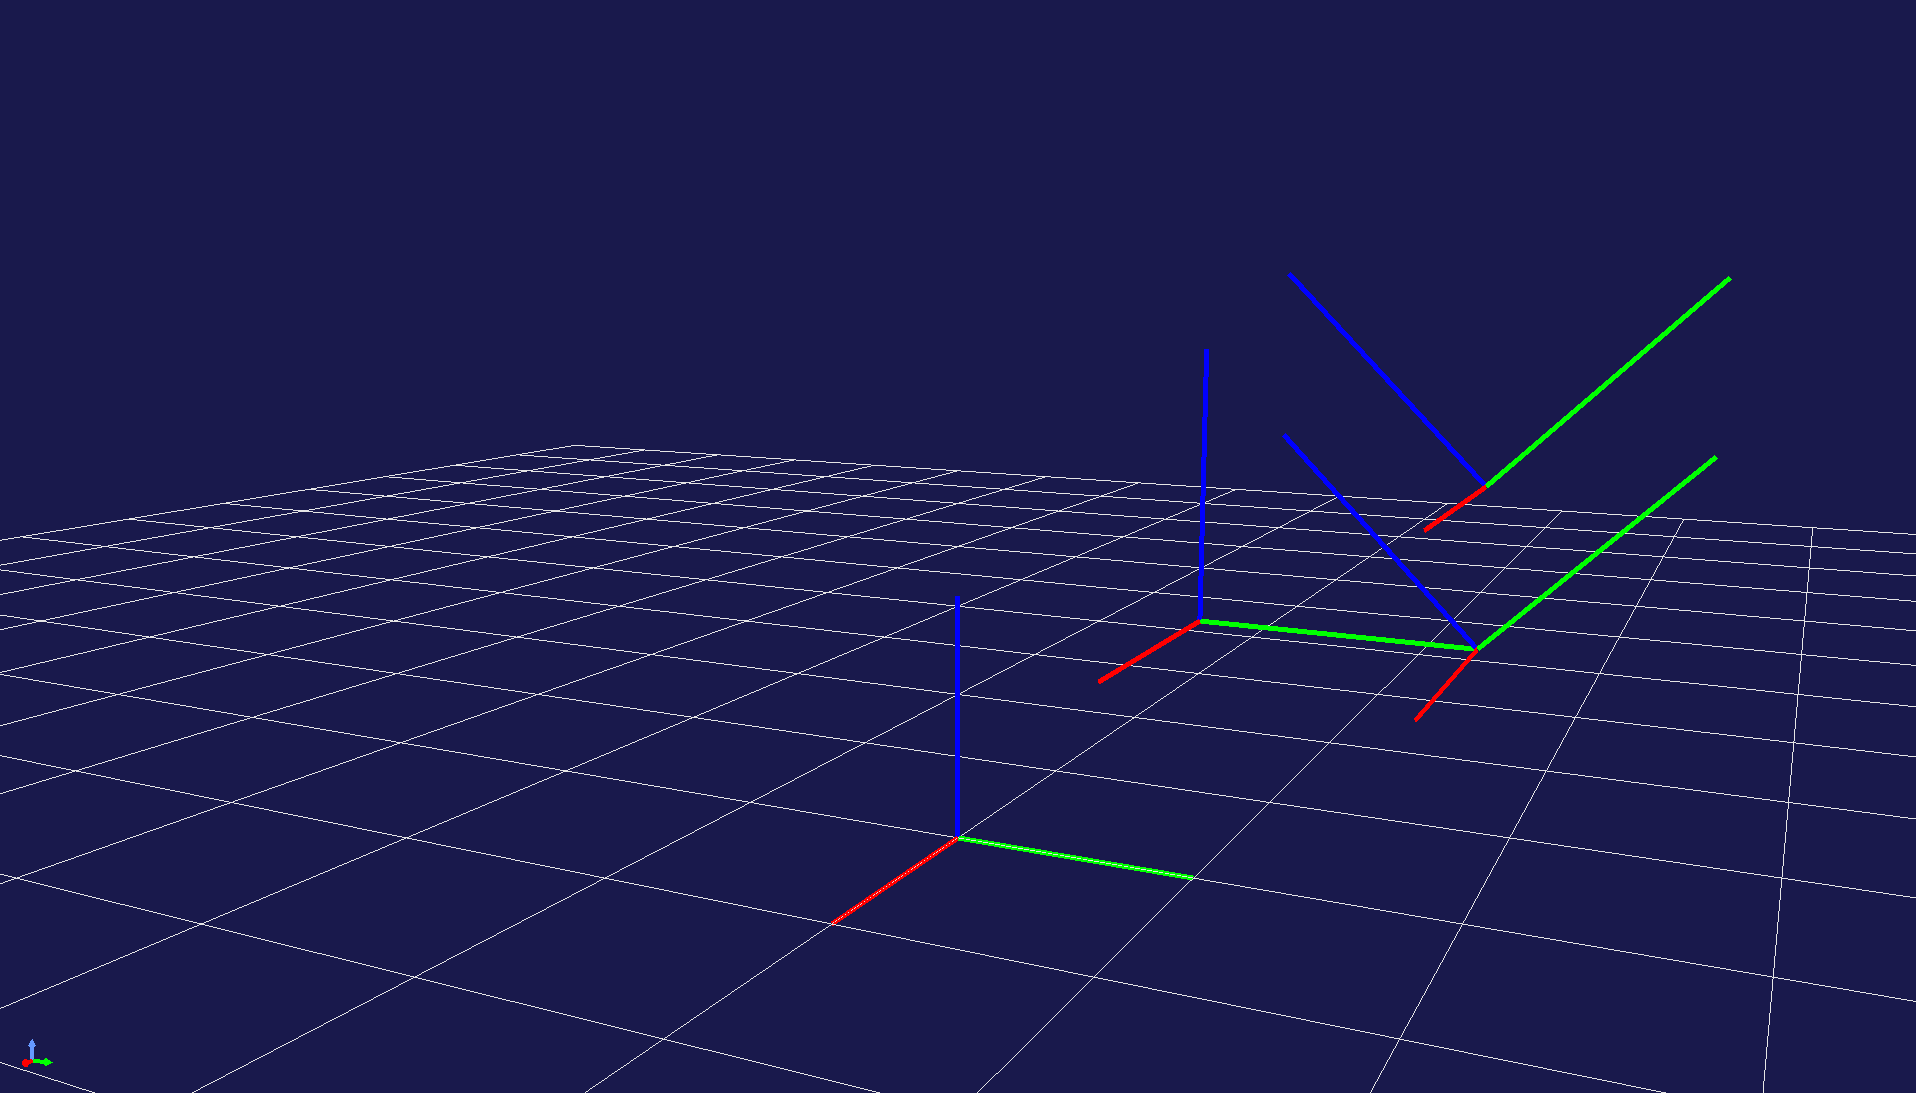

In [14]:
%display

## 練習問題
sigma1を動かして、sigmaEEがorgと一致するようにしてみよう

(ここでは、原点からの座標系1の変換 T0_1 のみを変更する)

In [15]:
T1_ee=sigma1.transformation(sigmaEE)

In [16]:
T1_ee

<coordinates[0x5650e50d52c0] 0 0.5 0.282843 / 0.382683 0 0 0.92388 >

解答の計算

In [17]:
T0_1=T1_ee.inverse_transformation()

解答を使った座標系の計算

In [18]:
sigma1=org.copy().transform(T0_1)

In [19]:
sigma2=sigma1.copy().transform(T1_2)

In [20]:
sigmaEE=sigma2.copy().transform(T2_ee)

エンドエフェクタ位置の確認

In [21]:
sigmaEE

<coordinates[0x5650e50eeb00] 0 0 5.55112e-17 / 0 0 0 1 >

解答の表示

In [22]:
di.clear()

In [23]:
di.addObjects(mkshapes.makeCoords(coords=sigmaEE, length=0.5, lineWidth=5))

In [24]:
di.addObjects(mkshapes.makeCoords(coords=sigma2, length=0.5, lineWidth=5))

In [25]:
di.addObjects(mkshapes.makeCoords(coords=sigma1, length=0.5, lineWidth=5))

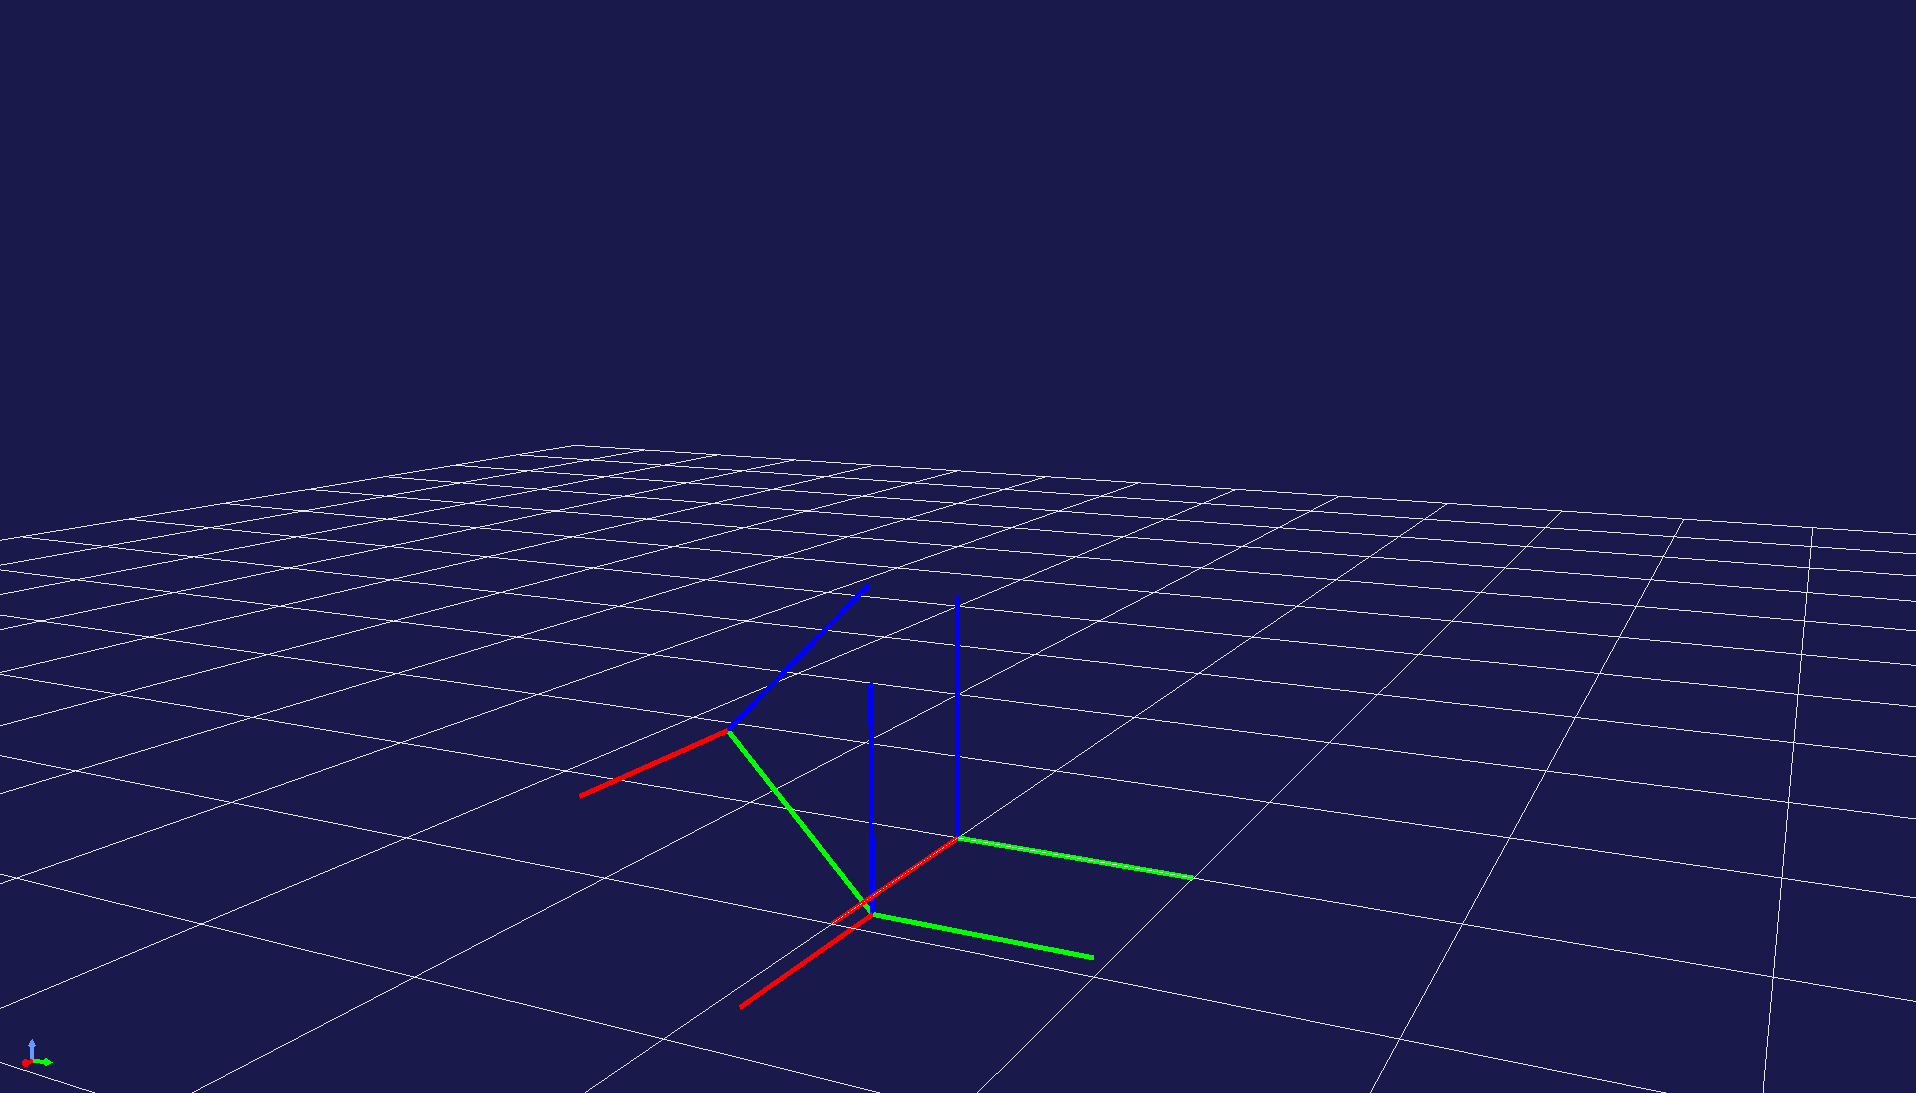

In [26]:
%display

### 練習問題の別解

DrawInterfaceの原点を移動させて同様な表示となるか確認する。

In [27]:
di1 = DrawInterface()

In [28]:
sigma1=coordinates()
di1.addObjects(mkshapes.makeCoords(coords=sigma1, length=0.5, lineWidth=5))

In [29]:
sigma2=sigma1.copy().transform(T1_2)
di1.addObjects(mkshapes.makeCoords(coords=sigma2, length=0.5, lineWidth=5))

In [30]:
sigmaEE=sigma2.copy().transform(T2_ee)
di1.addObjects(mkshapes.makeCoords(coords=sigmaEE, length=0.5, lineWidth=5))

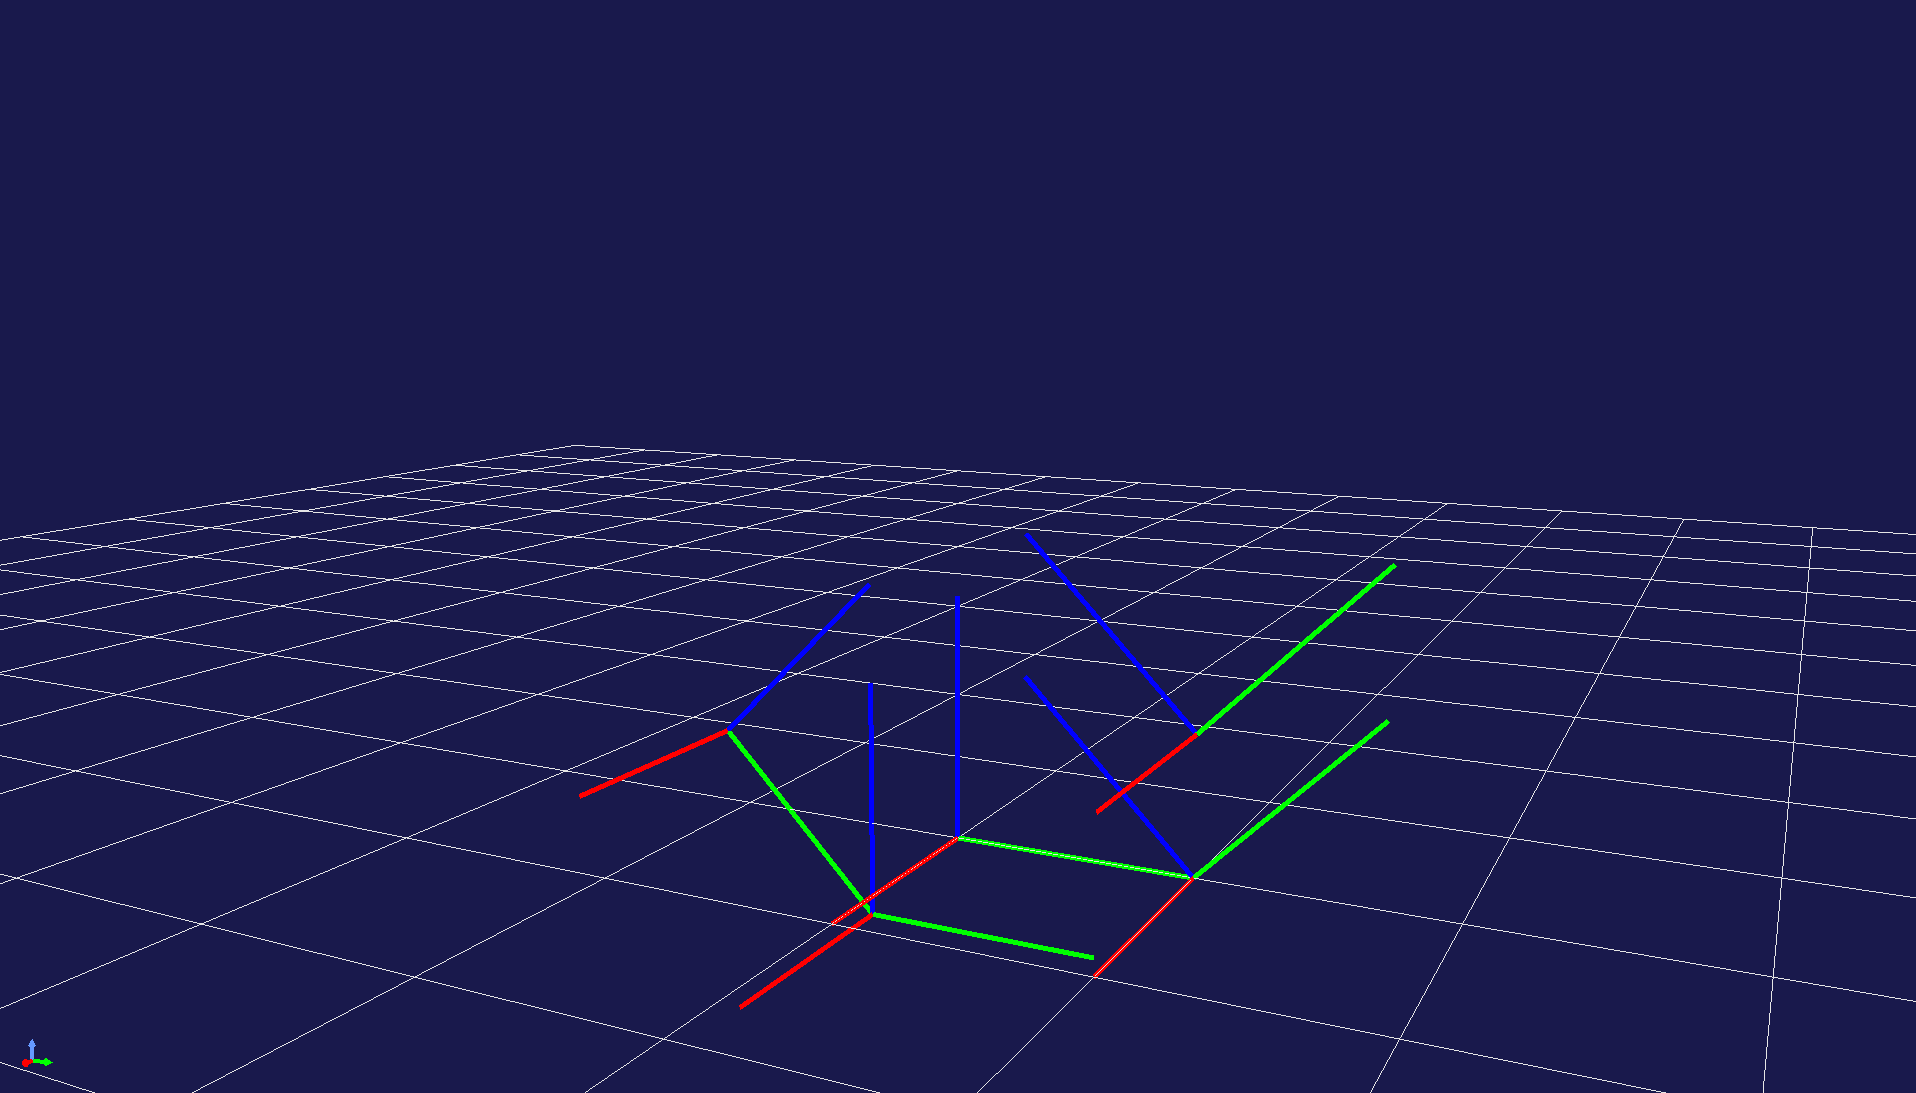

In [31]:
%display

座標系を動かしてみる

In [32]:
di1.translate(fv(0,0,0.5))

Wrap <class 'irsl_choreonoid.draw_coords.GeneralDrawInterfaceWrapped'> : <coordinates[0x5650e50f01b0] 0 0 0.5 / 0 0 0 1 >

In [33]:
di1.rotate(-PI/6, coordinates.X)

Wrap <class 'irsl_choreonoid.draw_coords.GeneralDrawInterfaceWrapped'> : <coordinates[0x5650e50f01b0] 0 0 0.5 / -0.258819 0 0 0.965926 >

この時のエンドエフェクタの位置

In [35]:
di1.copy().transform(T1_ee)

<coordinates[0x5650e39c0f30] 0 0.574434 0.494949 / 0.130526 0 0 0.991445 >

解答の確認

In [36]:
di1.newcoords(T0_1)

Wrap <class 'irsl_choreonoid.draw_coords.GeneralDrawInterfaceWrapped'> : <coordinates[0x5650e50f01b0] -0 -0.553553 0.153553 / -0.382683 0 0 0.92388 >

エンドエフェクタ位置の確認

In [37]:
di1.copy().transform(T1_ee)

<coordinates[0x5650e39c0f30] 0 0 0 / 0 0 0 1 >

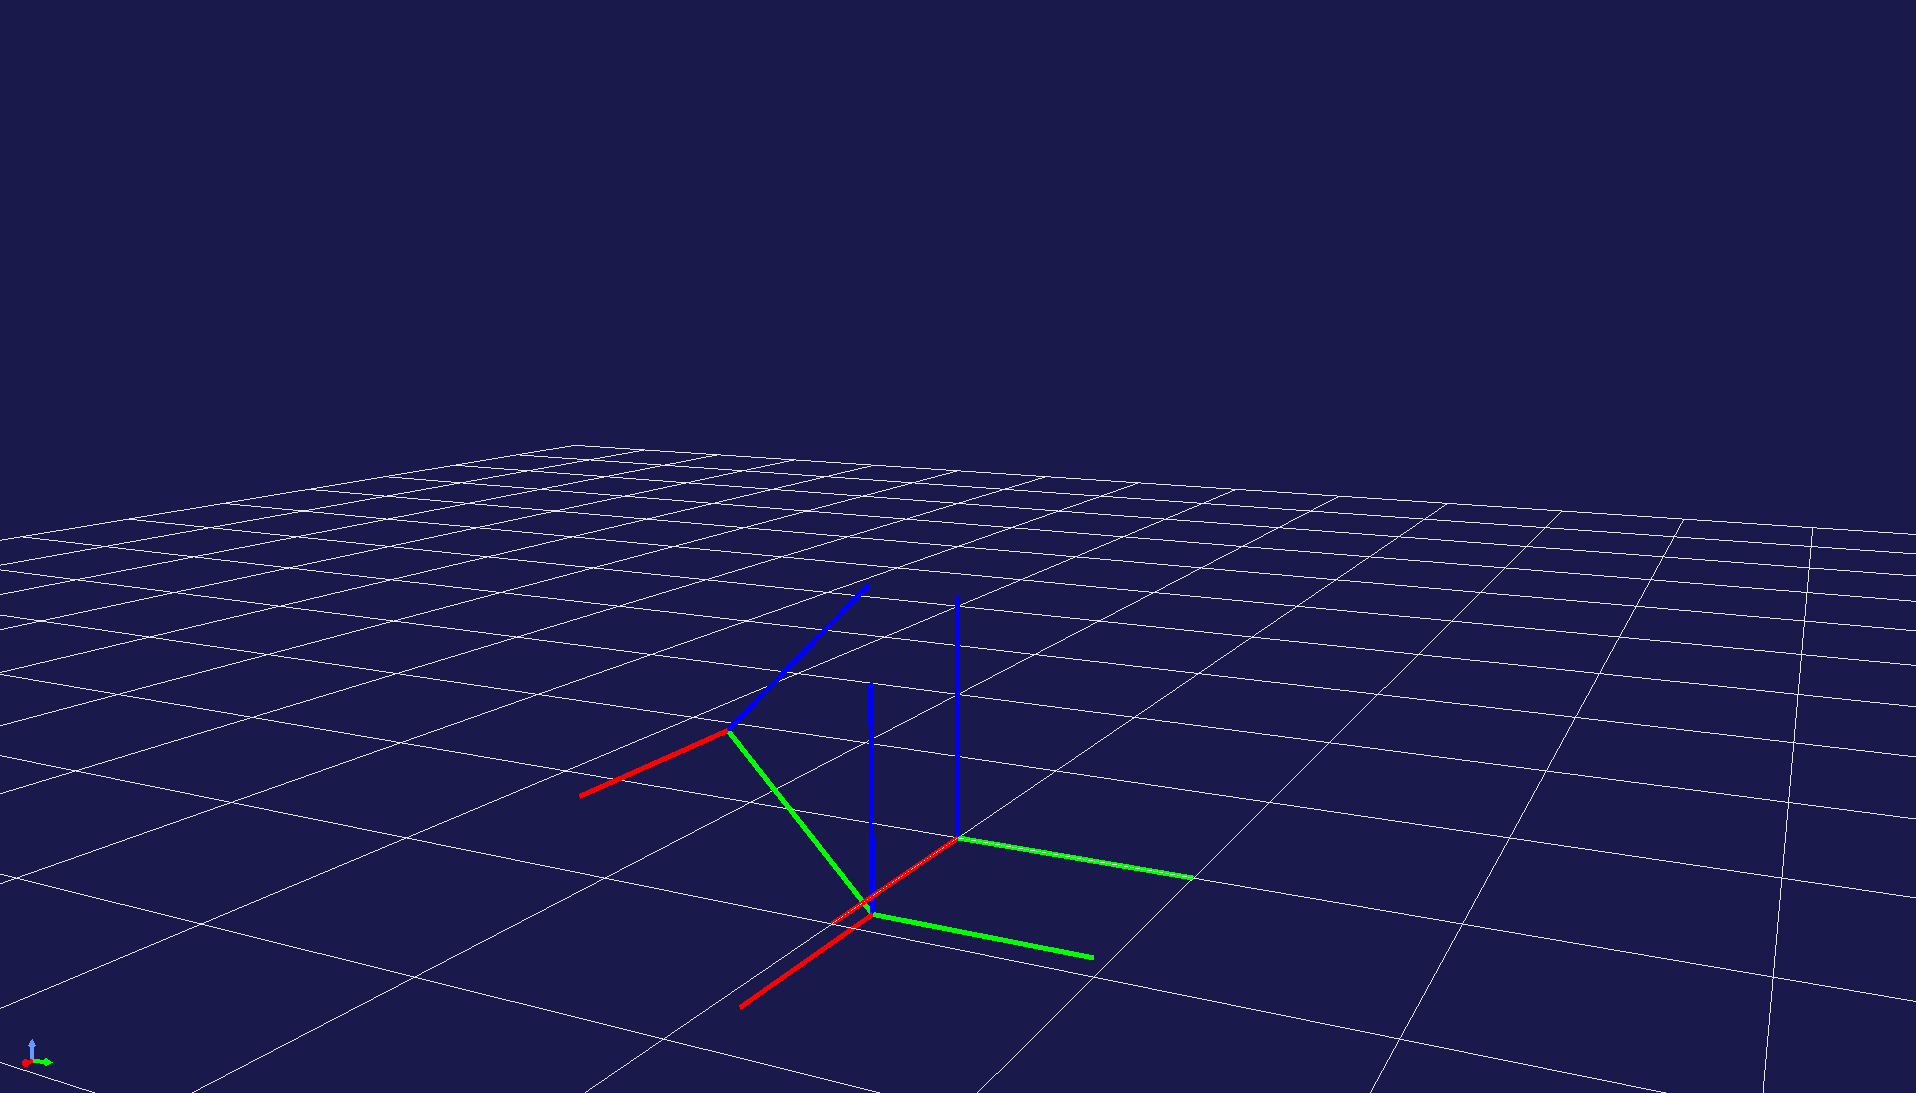

In [38]:
%display